In [17]:
import pandas as pd
import pickle
import re

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [125]:
# Import international HSR data
hsr_df = pd.read_csv('../data/international_train_data.csv')
hsr_df

,Origin,Destination,Distance_km,Duration
0,Barcelona,Madrid,505,2h45m
1,Madrid,Sevilla,392,2h35m
2,Madrid,Valladolid,163,0h55m
3,Madrid,Valencia,301,1h56m
4,Beijing,Shanghai,1064,4h52m
5,Shanghai,Hangzhou,165,1h6m
6,Shanghai,Wuhan,870,4h30m
7,Paris,Lille,204,1h10m
8,Paris,Lyon,394,1h56m
9,Paris,Bordeaux,499,2h17m


In [126]:
def duration_to_seconds(duration_str):
    # Regular expression to extract hours and minutes
    pattern = re.compile(r'(?:(\d+)h)?(?:(\d+)m)?')
    match = pattern.match(duration_str)
    
    if not match:
        raise ValueError("Invalid duration format")
    
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    
    # Convert hours and minutes to seconds
    total_seconds = hours * 3600 + minutes * 60
    
    return total_seconds

def duration_to_minutes(duration_str):
    # Regular expression to extract hours and minutes
    pattern = re.compile(r'(?:(\d+)h)?(?:(\d+)m)?')
    match = pattern.match(duration_str)
    
    if not match:
        raise ValueError("Invalid duration format")
    
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    
    # Convert hours to minutes and add minutes
    total_minutes = hours * 60 + minutes
    
    return total_minutes

In [127]:
# Save distance in miles
hsr_df['Distance_miles'] = hsr_df['Distance_km'] * 0.621371

# Save duration in seconds and minutes
hsr_df['Duration_seconds'] = hsr_df['Duration'].apply(lambda x: duration_to_seconds(x))
hsr_df['Duration_minutes'] = hsr_df['Duration'].apply(lambda x: duration_to_minutes(x))
hsr_df

,Origin,Destination,Distance_km,Duration,Distance_miles,Duration_seconds,Duration_minutes
0,Barcelona,Madrid,505,2h45m,313.792355,9900,165
1,Madrid,Sevilla,392,2h35m,243.577432,9300,155
2,Madrid,Valladolid,163,0h55m,101.283473,3300,55
3,Madrid,Valencia,301,1h56m,187.032671,6960,116
4,Beijing,Shanghai,1064,4h52m,661.138744,17520,292
5,Shanghai,Hangzhou,165,1h6m,102.526215,3960,66
6,Shanghai,Wuhan,870,4h30m,540.592770,16200,270
7,Paris,Lille,204,1h10m,126.759684,4200,70
8,Paris,Lyon,394,1h56m,244.820174,6960,116
9,Paris,Bordeaux,499,2h17m,310.064129,8220,137


In [128]:
# Fit linear model to data
d = hsr_df['Distance_miles'].values.reshape(-1, 1)
t = hsr_df['Duration_minutes'].values

hsr_model = LinearRegression()
hsr_model.fit(d, t)
hsr_slope = hsr_model.coef_[0]
hsr_intercept = hsr_model.intercept_
print(f'y = {hsr_slope}x + {hsr_intercept}')

y = 0.41490134284090746x + 28.269916258519117


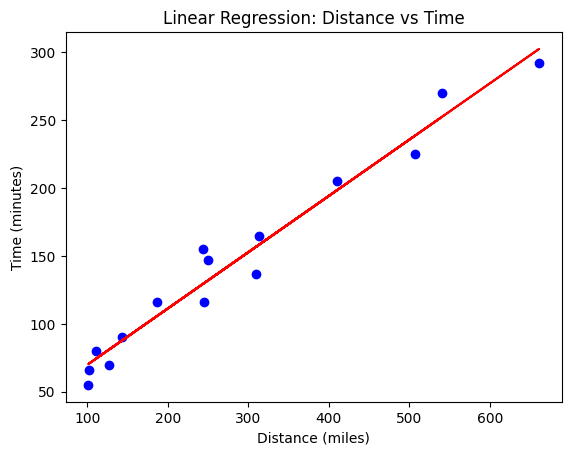

In [129]:
plt.scatter(hsr_df['Distance_miles'], hsr_df['Duration_minutes'], color='blue')
plt.plot(hsr_df['Distance_miles'], hsr_model.predict(d), color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Time (minutes)')
plt.title('Linear Regression: Distance vs Time')
plt.show()

In [26]:
# Driving distance based on averages from Google Maps
dist_pickle = '../data/pickled/distance_df.pickle'
with open(dist_pickle, 'rb') as file:
    dist_df = pickle.load(file)

# Create dataframe to look at city pairs
city_pairs = dist_df.copy()
city_pairs['CityPair'] = city_pairs.apply(lambda x: tuple(sorted([x['Origin'], x['Destination']])), axis=1)
city_pairs = city_pairs.drop(columns=['Origin','Destination'])
# Groupby
city_pairs = city_pairs.groupby('CityPair').mean().reset_index()
city_pairs

,CityPair,Distance_meters,Distance_miles,Duration_seconds,Duration_minutes
0,"(Abilene, TX, Akron, OH)",2136773.5,1327.729086,69543.0,1159.0
1,"(Abilene, TX, Albany, GA)",1581900.0,982.946785,54590.0,910.0
2,"(Abilene, TX, Albany, NY)",2916235.0,1812.063858,94709.0,1578.5
3,"(Abilene, TX, Albany, OR)",3078305.5,1912.769767,104797.5,1746.5
4,"(Abilene, TX, Albuquerque, NM)",784616.5,487.537939,26933.5,448.5
...,...,...,...,...,...
74686,"(York, PA, Yuba City, CA)",4333506.0,2692.714957,141599.0,2360.0
74687,"(York, PA, Yuma, AZ)",3927261.5,2440.286406,129393.5,2156.5
74688,"(Youngstown, OH, Yuba City, CA)",3893197.0,2419.119713,126768.5,2112.5
74689,"(Youngstown, OH, Yuma, AZ)",3584812.0,2227.498217,117245.5,1954.0


In [40]:
# Randomly select 25 rows where distance is between 50 and 800 miles
sample = city_pairs.loc[(city_pairs['Distance_miles']>100) & (city_pairs['Distance_miles']<800)].sample(n=25)

y = 0.9062392396626374x + 10.665790535110148


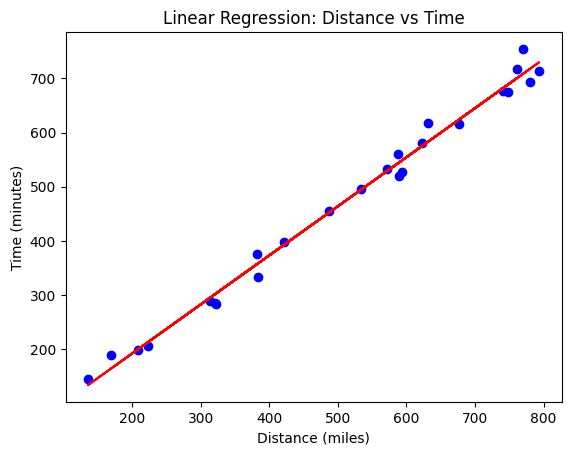

In [81]:
# Fit linear model to data
d = sample['Distance_miles'].values.reshape(-1, 1)
t = sample['Duration_minutes'].values

drive_model = LinearRegression()
drive_model.fit(d, t)
drive_slope = drive_model.coef_[0]
drive_intercept = drive_model.intercept_
print(f'y = {drive_slope}x + {drive_intercept}')

plt.scatter(sample['Distance_miles'], sample['Duration_minutes'], color='blue')
plt.plot(sample['Distance_miles'], drive_model.predict(d), color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Time (minutes)')
plt.title('Linear Regression: Distance vs Time')
plt.show()

In [37]:
sample

,CityPair,Distance_meters,Distance_miles,Duration_seconds,Duration_minutes
21697,"(Champaign, IL, Waterloo, IA)",516614.5,321.009268,17108.0,285.0
28945,"(Dallas, TX, Denver, CO)",1277114.5,793.561914,42865.0,714.5
30488,"(Decatur, AL, Greenville, NC)",1089604.0,677.048327,37013.0,616.5
37654,"(Fayetteville, AR, Lima, OH)",1255592.5,780.188767,41590.0,693.5
16156,"(Bowling Green, KY, Iowa City, IA)",858689.5,533.564753,29736.0,495.5
45828,"(Harrisburg, PA, Lexington Park, MD)",272666.0,169.426745,11401.5,190.0
52117,"(Jonesboro, AR, Kansas City, MO)",615089.5,382.198778,22484.5,375.0
518,"(Akron, OH, Grand Rapids, MI)",518571.5,322.225292,17046.0,284.0
62211,"(Midland, MI, Sandusky, OH)",359628.0,223.462410,12315.0,205.0
3264,"(Altoona, PA, Louisville, KY)",784358.5,487.377626,27266.5,454.5


In [56]:
# Flight data between MSAs
# Each row represents the sum for a specific flight route for the month.
# Data covers Jan-Apr 2024
flight_pickle = '../data/pickled/flights_df.pickle'
with open(flight_pickle, 'rb') as file:
    flights_df = pickle.load(file)

sub_flights = flights_df[['DEPARTURES_PERFORMED','DISTANCE','RAMP_TO_RAMP','CityPair']]
flight_cities = sub_flights.groupby('CityPair').agg({
    'DEPARTURES_PERFORMED': 'sum',
    'DISTANCE': 'mean',
    'RAMP_TO_RAMP': 'sum'
}).reset_index()



In [57]:
flight_cities['avg_time'] = flight_cities.apply(lambda x: x['RAMP_TO_RAMP']/x['DEPARTURES_PERFORMED'], axis=1)

In [58]:
flight_cities

,CityPair,DEPARTURES_PERFORMED,DISTANCE,RAMP_TO_RAMP,avg_time
0,"(Abilene, TX, Alexandria, LA)",1.0,426.000000,78.0,78.000000
1,"(Abilene, TX, Atlanta, GA)",1.0,889.000000,167.0,167.000000
2,"(Abilene, TX, Brownsville, TX)",1.0,443.000000,105.0,105.000000
3,"(Abilene, TX, Chattanooga, TN)",1.0,852.000000,185.0,185.000000
4,"(Abilene, TX, Dallas, TX)",1165.0,158.000000,66367.0,56.967382
...,...,...,...,...,...
3898,"(Washington, DC, Waterbury, CT)",2.0,288.000000,222.0,111.000000
3899,"(Washington, DC, Wausau, WI)",2.0,768.000000,244.0,122.000000
3900,"(Washington, DC, Wichita, KS)",227.0,1110.000000,39703.0,174.903084
3901,"(Washington, DC, Wilmington, NC)",527.0,319.307692,43735.0,82.988615


In [63]:
flight_cities.loc[flight_cities['CityPair']==('Dallas, TX', 'Denver, CO') 	]

,CityPair,DEPARTURES_PERFORMED,DISTANCE,RAMP_TO_RAMP,avg_time
1751,"(Dallas, TX, Denver, CO)",6133.0,643.378049,745615.0,121.57427


In [78]:
# Randomly select 25 rows where distance is between 50 and 800 miles
flight_sample = flight_cities.loc[(flight_cities['DISTANCE']>100) & (flight_cities['DISTANCE']<800) & (flight_cities['DEPARTURES_PERFORMED']>10)].sample(n=25)

y = 0.1239540935998779x + 40.8089933727839


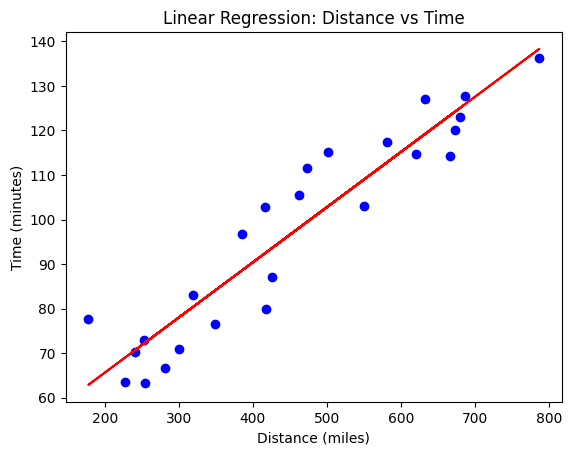

In [79]:
# Fit linear model to data
d = flight_sample['DISTANCE'].values.reshape(-1, 1)
t = flight_sample['avg_time'].values

flight_model = LinearRegression()
flight_model.fit(d, t)
flight_slope = flight_model.coef_[0]
flight_intercept = flight_model.intercept_
print(f'y = {flight_slope}x + {flight_intercept}')

plt.scatter(flight_sample['DISTANCE'], flight_sample['avg_time'], color='blue')
plt.plot(flight_sample['DISTANCE'], flight_model.predict(d), color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Time (minutes)')
plt.title('Linear Regression: Distance vs Time')
plt.show()

In [80]:
flight_sample

,CityPair,DEPARTURES_PERFORMED,DISTANCE,RAMP_TO_RAMP,avg_time
1447,"(Chicago, IL, Scranton, PA)",589.0,632.000000,74891.0,127.149406
3054,"(Louisville, KY, New Orleans, LA)",66.0,620.000000,7578.0,114.818182
2160,"(Durham, NC, St. Louis, MO)",329.0,666.461538,37624.0,114.358663
1598,"(Colorado Springs, CO, Phoenix, AZ)",680.0,550.000000,70040.0,103.000000
2261,"(Fayetteville, AR, Nashville, TN)",77.0,426.000000,6708.0,87.116883
1333,"(Chattanooga, TN, Chicago, IL)",657.0,501.000000,75731.0,115.267884
97,"(Albuquerque, NM, Denver, CO)",1664.0,349.000000,127478.0,76.609375
709,"(Beckley, WV, Charlotte, NC)",346.0,178.000000,26843.0,77.580925
343,"(Atlanta, GA, Johnson City, TN)",905.0,227.000000,57469.0,63.501657
3901,"(Washington, DC, Wilmington, NC)",527.0,319.307692,43735.0,82.988615


# Plot 3 regression lines
HSR: y = 0.41490134284090746x + 28.269916258519117 + 70  
Car: y = 0.9062392396626374x + 10.665790535110148  
Flight: y = 0.1239540935998779x + 40.8089933727839 + 200

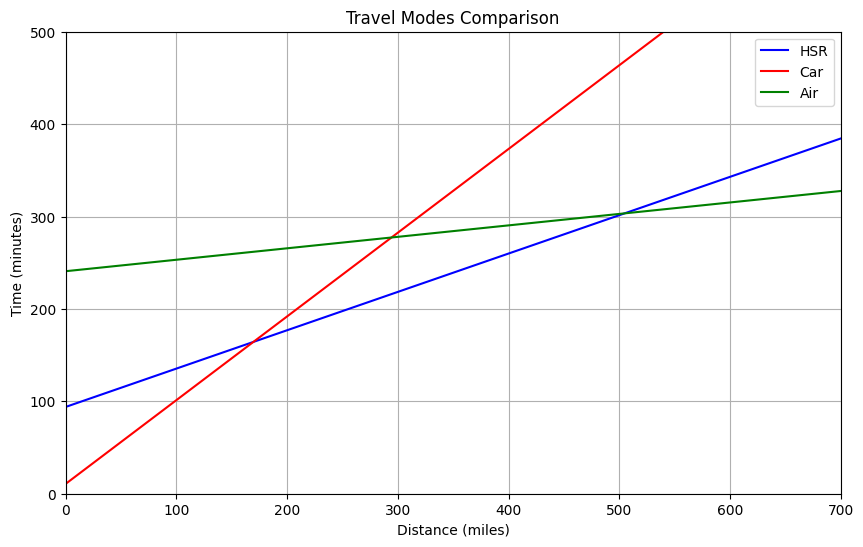

In [133]:
import numpy as np
# Generate x-values
x = np.linspace(0, 800, 100)

# Calculate y-values for each line
hsr = 0.415 * x + 93.917
car = 0.906 * x + 10.665
flight = 0.124 * x + 240.809

# Plot the lines
plt.figure(figsize=(10, 6))

plt.plot(x, hsr, label='HSR', color='blue')
plt.plot(x, car, label='Car', color='red')
plt.plot(x, flight, label='Air', color='green')

# Adding titles and labels
plt.title('Travel Modes Comparison')
plt.xlabel('Distance (miles)')
plt.ylabel('Time (minutes)')

# Set the x and y axis limits
plt.xlim(0, 700)  # Set x-axis limits
plt.ylim(0, 500)  # Set y-axis limits


# Show legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()